In [1]:
from skimage import io, data
import os
import numpy as np
import skimage
from matplotlib.pyplot import figure, subplot
from scipy import ndimage, signal
from skimage import io, img_as_float, data, filters, img_as_ubyte, util
from matplotlib import pyplot as plt
from skimage.feature import canny
from skimage.filters import median, gaussian, sobel
from skimage.morphology import dilation, erosion, disk
from skimage.filters.edges import convolve
from ipykernel.pylab.backend_inline import flush_figures
from ipywidgets import interact, interactive, fixed
from numpy import array
import warnings

In [2]:
class Load:
    def __init__(self):
        return

    @staticmethod
    def img(file):
        img = os.path.join('C:/Users/jedrz/Desktop/lab4_kck/kck/lab4/res/', file)
        return img

In [70]:
class Filter:
    def __init__(self):
        return

    @staticmethod
    def gray(img):
        gray_img = io.imread(img, as_gray=True)
        figure(figsize=(20,20))
        #io.imshow(gray_img)
        #plt.show()
        return gray_img

    @staticmethod
    def median(img):
        median_img = io.imread(img)
        med = median(median_img)
        io.imshow(med)
        plt.show()

    @staticmethod
    def gaussian(img):
        gaus_img = io.imread(img)
        gaus = gaussian(gaus_img, sigma=1)
        #io.imshow(gaus)
        #plt.show()
        return gaus

    @staticmethod
    def sobel(img):
        warnings.simplefilter("ignore")
        sob = sobel(img)
        return sob

    @staticmethod
    def canny(img):
        warnings.simplefilter("ignore")
        figure(figsize=(20,20))
        can_img = io.imread(img)
        can = ski.feature.canny(img, sigma=3)
        return can
    @staticmethod
    def dilation(img):
        dilation_img = io.imread(img)
        dil = dilation(dilation_img)
        #io.imshow(dil)
        #plt.show()
        return dil
       
    @staticmethod
    def erosion(img):
        erosion_img = io.imread(img)
        ero = erosion(erosion_img)
        #io.imshow(ero)
        #plt.show()
        return ero

    @staticmethod
    def contur3(img_in):
        warnings.simplefilter("ignore")
        #img = img_as_float(io.imread(img_in)) 
        img = img_as_float(img_in)
        
        #figure(figsize=(20,20))

        #Kh = array([[ 2, 4, 2],
        #            [ 0, 0, 0],
        #            [-2,-4,-2]]) 
        #Kh = Kh / 8

        #Kv = array([[ 2, 0,-2],
        #            [ 4, 0,-4],
        #            [ 2, 0,-2]])
        #Kv = Kv / 8
        
        Kh = array([[ 1, 2, 1],
                    [ 0, 0, 0],
                    [-1,-2,-1]]) 
        Kh = Kh / 4

        Kv = array([[ 1, 0,-1],
                    [ 2, 0,-2],
                    [ 1, 0,-1]])
        Kv = Kv / 4

        hor = np.abs(convolve(img, Kh))
        ver = np.abs(convolve(img, Kv))
        
        res = np.sqrt(hor**2 + ver**2)
        #res = np.sqrt(hor*0.5 + ver*0.5)
        #res = (hor+ver)/2

        return res
    def thresh(img, t):
        warnings.simplefilter("ignore")
        binary = (img > t) * 255
        binary = np.uint8(binary)
        return binary
    
    def on_change(img, perc=0.5):
        MIN = np.percentile(img, perc)
        MAX = np.percentile(img, 100-perc)
        #Percentyl – kwantyl rzędu k/100, gdzie k=1, … , 99.
        #Intuicyjnie mówiąc, percentyl jest wielkością, poniżej której padają wartości zadanego procentu próbek.

        norm = (img - MIN) / (MAX - MIN)
        norm[norm[:,:] > 1] = 1
        norm[norm[:,:] < 0] = 0
        
        return norm
        #figure(figsize=(15,5))
        #subplot(1,2,1); plt.imshow(norm, cmap='gray')
        #flush_figures()
    def noise(img, r, noise_prop = 0.0):
        warnings.simplefilter("ignore")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
        imgProc = skimage.util.random_noise(img[0], mode='s&p', amount=noise_prop)    
        out = filters.median(imgProc, disk(r))
        #out = imgProc
        return out
        #axes[0].imshow(out, cmap=plt.cm.gray)
        #getHist(out, axes[1])
        #flush_figures()

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

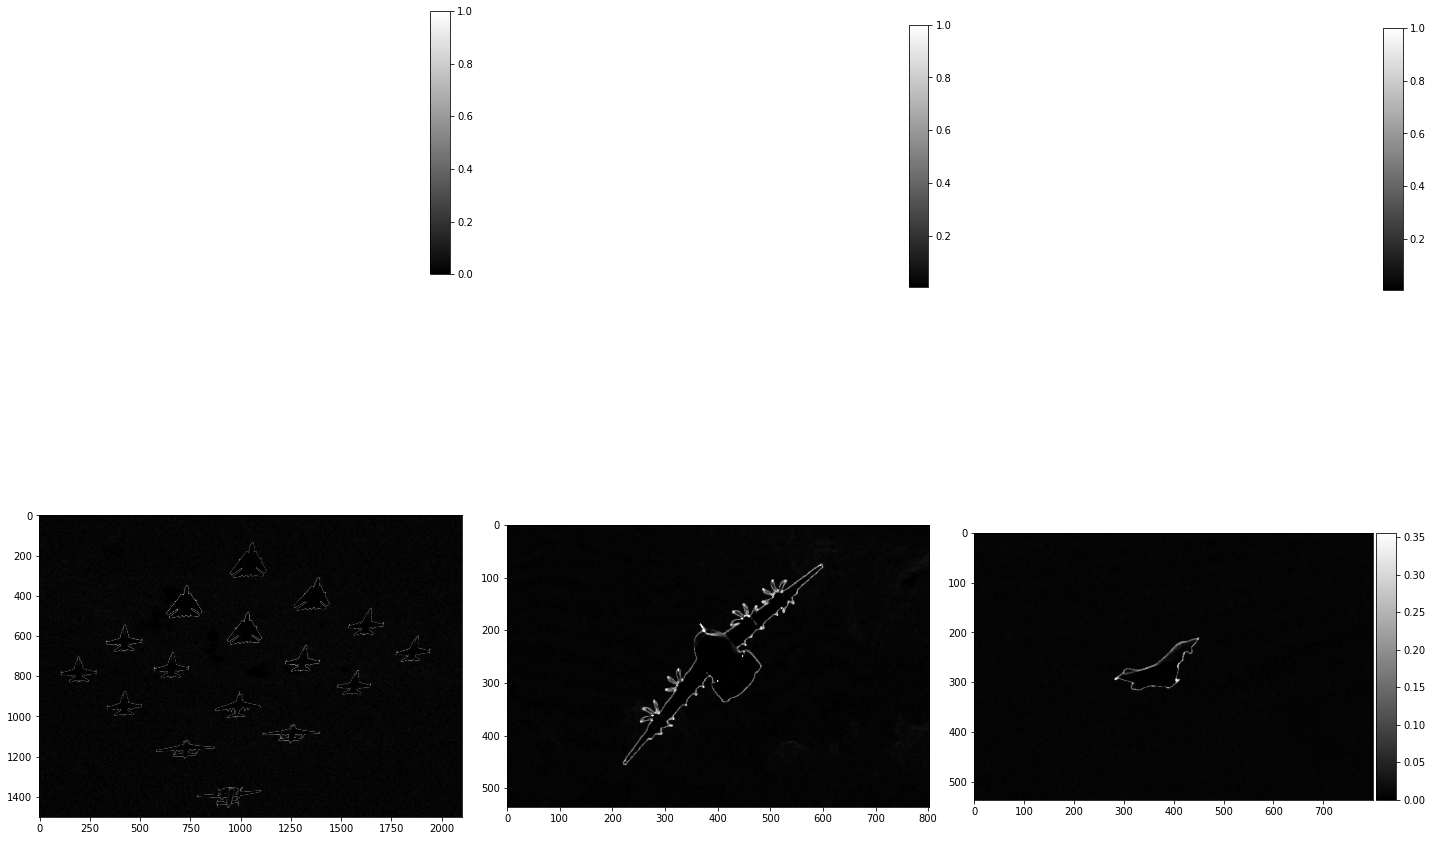

In [201]:
# Jak wczytujemy obrazek od razu do contur3, jego tablica jest 3d, a jak obrobimy go wczesniej jakąś funkcją do filtrowania
# typu gray, to jego tablica jest 2d
def main():
    img1 = Load.img('samolot10.jpg') #10
    img2 = Load.img('samolot01.jpg') #01
    img3 = Load.img('samolot08.jpg') #08
    img4 = Load.img('samolot00.jpg') #00
    img5 = Load.img('samolot11.jpg') #11
    img6 = Load.img('samolot09.jpg') #09

    g_img1 = Filter.gray(img1)**4
    g_img2 = Filter.gray(img2)**1
    g_img3 = Filter.gray(img3)**2
    g_img4 = Filter.gray(img4)**2
    g_img5 = Filter.gray(img5)**4
    g_img6 = Filter.gray(img6)**4
    
    #obrazek nr 1
    #subplot(2,3,1) 
    #io.imshow(g_img1)
    noiseconvert = Filter.on_change(Filter.sobel(g_img1), perc=0.4)
    subplot(2,3,1) 
    io.imshow(filters.median(noiseconvert, disk(3)), cmap='gray')
    
    #obrazek nr 2
    #subplot(2,3,1) 
    #io.imshow(g_img2)
    noiseconvert = Filter.on_change(Filter.sobel(g_img2), perc=0.4)
    subplot(2,3,2) 
    io.imshow(filters.median(noiseconvert, disk(3)), cmap='gray')
    
    #obrazek nr 3
    #subplot(2,3,1) 
    #io.imshow(g_img3)
    noiseconvert = Filter.on_change(Filter.sobel(g_img3), perc=0.3)
    subplot(2,3,3) 
    io.imshow(filters.median(noiseconvert, disk(3)), cmap='gray')
    
    #obrazek nr 4 do zrobienia
    #subplot(2,3,1) 
    #io.imshow(g_img4)
    noiseconvert = Filter.contur3(g_img4)
    subplot(2,3,4) 
    io.imshow(filters.median(noiseconvert, disk(3)), cmap='gray')
    
    #obrazek nr 5
    #subplot(2,3,1) 
    #io.imshow(g_img5)
    noiseconvert = Filter.on_change(Filter.sobel(g_img5), perc=0.6)
    subplot(2,3,5) 
    io.imshow(filters.median(noiseconvert, disk(3)), cmap='gray')
    
    #obrazek nr 6
    #subplot(2,3,1) 
    #io.imshow(g_img6)
    noiseconvert = Filter.sobel(g_img6)
    subplot(2,3,6) 
    io.imshow(filters.median(noiseconvert, disk(3)), cmap='gray')


if __name__ == '__main__':
    main()